# x-vectorの主成分解析
512次元の各話者の平均x-vectorを主成分解析により2次元に圧縮  
これによりx-vectorが話者の特徴を捉えられているのか（似た声の人は値が似通る）を確認  

---  

jvsコーパスでx-vectorの主成分解析を行っていた論文 【[pdf](http://www.me.cs.scitec.kobe-u.ac.jp/~takigu/pdf/2022/yoshi-1-3P-15#:~:text=x%2Dvector%20%E3%81%AF%20%E8%A9%B1%E8%80%85,%E3%81%A6%E3%81%84%E3%82%8B%E3%81%A8%E8%80%83%E3%81%88%E3%82%89%E3%82%8C%E3%82%8B%EF%BC%8E)】  
主成分解析の仕方 【[サイト](https://corvus-window.com/python_pca/)】  

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


### データ読み込み

In [3]:
vecfile_path = "/mnt/data/users/snegishi/M2/espnet/egs2/jvs_ms_negishi/tts1/Xvector_Bert/data/NL_Xvector.csv"
idfile_path = "/mnt/data/users/snegishi/M2/espnet/egs2/jvs_ms_negishi/tts1/Xvector_Bert/data/id_and_NL.csv"


In [4]:
vector_df = pd.read_csv(vecfile_path, header=None)
id_df = pd.read_csv(idfile_path, header=None, names=['id', 'text'])

id = id_df['id'].tolist()
text = id_df['text'].tolist()
vector = vector_df.iloc[:,1:].values.tolist()
df = pd.DataFrame([id,text,vector],index=['id', 'text', 'vector']).T


In [5]:
df


,id,text,vector
0,10,おとなしく幼さを感じる女子中学生,"[4.8685336, 1.6393852, -1.142738, 0.87616825, ..."
1,11,中性的な声の青年,"[3.3836458, 0.19131708, 0.7384241, -1.0163487,..."
2,14,少年ぽさを感じる女の子,"[0.67333746, 1.3283898, 0.3969247, 0.07427225,..."
3,15,20歳程度のお姉さん,"[4.632967, 0.93854123, 0.28227118, 1.5152671, ..."
4,18,ゆっくり間を開けて話す女性,"[3.0733163, 1.2505141, -0.6784617, 0.8098818, ..."
...,...,...,...
74,92,早口で話すかすれた声のおばさん,"[-0.62758416, 0.82127064, 0.660933, -1.9123818..."
75,95,20～30歳ぐらいの女性,"[3.4811895, 0.7982813, 1.5447563, 0.7070177, -..."
76,96,高く細い声の女の人,"[0.45282713, 0.123208694, 1.6980885, -0.408190..."
77,97,ふわふわした高い声の男性,"[-0.7945494, 0.62038535, -0.5962068, -1.252256..."


### データの標準化

In [6]:
def standardize_nested_list(nested_list):
    # 2重のリストをNumPy配列に変換
    arr = np.array(nested_list)

    # 平均と標準偏差を計算（各要素に対して）
    mean = np.mean(arr)
    std = np.std(arr)

    # 標準化した配列を計算（各要素に対して）
    standardized_arr = (arr - mean) / std

    # 標準化された配列を2重のリストに変換して返す
    standardized_nested_list = standardized_arr.tolist()
    return standardized_nested_list


In [7]:
vectors = standardize_nested_list(vector)
dfs = pd.DataFrame(vectors)


### 主成分分析

In [8]:
pca = PCA()
pca.fit(dfs)
pca_row = pca.transform(dfs)


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.445684  0.096381  0.080308  0.041082  0.033311  0.029521  0.019849   

        PC8       PC9      PC10  ...      PC70      PC71      PC72      PC73  \
0  0.017784  0.017196  0.015193  ...  0.000421  0.000407  0.000389  0.000371   

       PC74      PC75      PC76          PC77          PC78          PC79  
0  0.000351  0.000313  0.000287  8.789575e-32  2.313714e-33  2.313714e-33  

[1 rows x 79 columns]


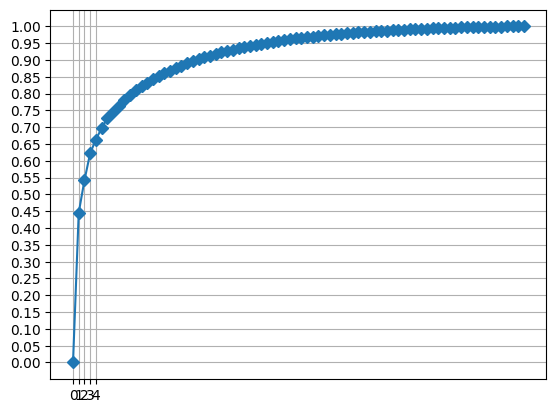

In [9]:
# 寄与率を求める
pca_col = ["PC{}".format(x + 1) for x in range(len(dfs.T.columns))]
df_con_ratio = pd.DataFrame([pca.explained_variance_ratio_], columns = pca_col)
print(df_con_ratio.head())

# 累積寄与率を図示する
cum_con_ratio = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
plt.plot(cum_con_ratio, 'D-')
plt.xticks(range(5))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()


           0         1         2         3         4         5         6    \
PC1   0.020186 -0.046888 -0.052068 -0.058246  0.061948 -0.044333  0.050413   
PC2  -0.075136  0.009488  0.029046 -0.012772  0.035240 -0.008107  0.082328   
PC3  -0.118892  0.021396  0.020491  0.011389  0.012701  0.039596  0.077697   
PC4  -0.141625 -0.049277 -0.015592 -0.022731 -0.110434 -0.019066 -0.029971   
PC5  -0.091967 -0.038198  0.021253 -0.017985 -0.098277 -0.021421 -0.035151   
...        ...       ...       ...       ...       ...       ...       ...   
PC75 -0.036018  0.033885 -0.034610 -0.030117  0.025374 -0.007232 -0.054053   
PC76  0.037285 -0.018221 -0.007149 -0.007624 -0.067812 -0.019034  0.007680   
PC77  0.004190  0.005824  0.113438 -0.140852  0.026642  0.025977  0.029240   
PC78  0.040007  0.043500  0.147269 -0.071707 -0.055044  0.159824 -0.453714   
PC79  0.046917 -0.263225  0.346623  0.039917  0.114630  0.054781  0.550583   

           7         8         9    ...       502       503    

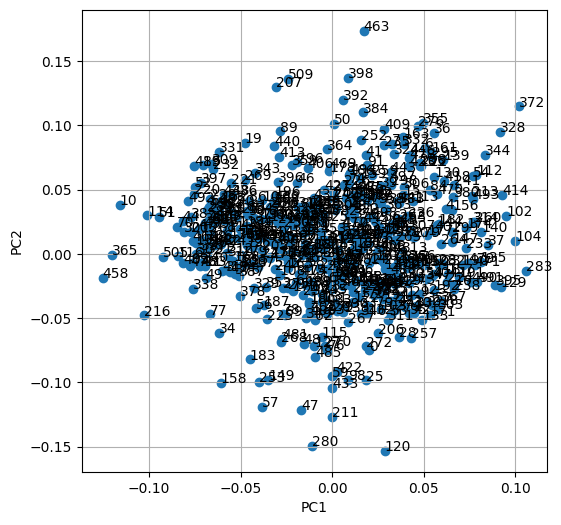

In [10]:
# 主成分負荷量を求める
df_pca = pd.DataFrame(pca_row, columns = pca_col)
df_pca_vec = pd.DataFrame(pca.components_, columns=dfs.columns,
                          index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))])
print(df_pca_vec)

# 主成分負荷量を図示する
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], dfs.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


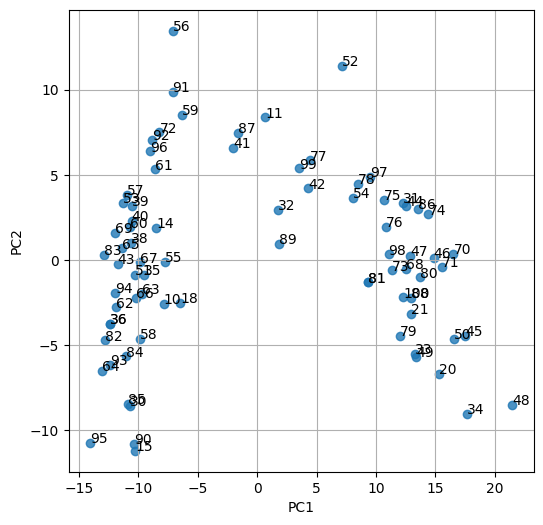

In [11]:
# 主成分得点を求める
plt.figure(figsize=(6, 6))
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_row[:, 0]
y = pca_row[:, 1]
annotations = df['id']
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()


In [12]:
df['pca1'] = pca_row[:,0]
df['pca2'] = pca_row[:,1]


In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.loc[:,['id','text','pca1']].sort_values('pca1').to_string(index=False))


 id                  text       pca1
 95          20～30歳ぐらいの女性 -14.111978
 64          ゆったり話すクールな女子 -13.069649
 83              声の高い成人女性 -12.921738
 82            しっかりしたお姉さん -12.814664
 93            セクシーな大人の女性 -12.414900
 36          少し声の低めの30代男性 -12.362446
 36       間をおいて話す明るい女子中学生 -12.362446
 94             優しい声の女子学生 -12.004030
 69            優しそうな熟年女上司 -11.980148
 62              少し声の低い女性 -11.899416
 43         少し声の低いおとなしい女子 -11.765528
 65  40～50歳ぐらいの感情豊かなおばちゃん -11.371265
 53              少し声の高い女性 -11.334765
 84       キリッとした真面目そうな女の子 -11.048544
 57              中音程30代女性 -10.982393
 85            少し声の高い成人女性 -10.884212
 30      ゆっくりと活舌悪くこもり声の女性 -10.726839
 60          女子高校生ぐらいの若い声 -10.676274
 38                中音程な女性 -10.655187
 40           丁寧に話す中音程な女性 -10.579875
 39            少し声の高い若い女性 -10.576169
 90        クールでか細い声の女子中学生 -10.397202
 51          明るくはきはきとした女子 -10.326721
 15            20歳程度のお姉さん -10.282064
 66             幼さが残る成人女性 -10.191969
 67       明るくテンションの高い女子高生  -9.891240
 

In [14]:
print(df.loc[:,['id','text','pca2']].sort_values('pca2').to_string(index=False))


 id                  text       pca2
 15            20歳程度のお姉さん -11.192846
 90        クールでか細い声の女子中学生 -10.780653
 95          20～30歳ぐらいの女性 -10.721356
 34  ゆっくり落ち着きのある低い声の５０代男性  -9.015148
 30      ゆっくりと活舌悪くこもり声の女性  -8.551620
 48                声の低い男性  -8.514374
 85            少し声の高い成人女性  -8.449434
 20                 早口な男性  -6.690715
 64          ゆったり話すクールな女子  -6.486117
 93            セクシーな大人の女性  -6.159820
 49             低めの声のおじさん  -5.688857
 84       キリッとした真面目そうな女の子  -5.651041
 33             間をおいて話す男性  -5.519168
 82            しっかりしたお姉さん  -4.724654
 58     おっとりとした声の高いおばあちゃん  -4.642386
 50        丁寧に話す声の低めのおじさん  -4.639824
 45           少し声の低い明るい男性  -4.459590
 79             冴えない軽そうな男  -4.443687
 36       間をおいて話す明るい女子中学生  -3.734782
 36          少し声の低めの30代男性  -3.734782
 21     ゆっくり淡々と話す40代のおじさん  -3.161806
 62              少し声の低い女性  -2.782732
 10      おとなしく幼さを感じる女子中学生  -2.562317
 18         ゆっくり間を開けて話す女性  -2.529946
 88     やさしそうな30代ぐらいのお兄さん  -2.235348
 66             幼さが残る成人女性  -2.203578
1

### ベクトル数値分析（仮）

In [15]:
arr = np.array(vector)
max = np.max(arr)
min = np.min(arr)

print(f"max: {max}")
print(f"min: {min}")


max: 8.198106
min: -8.359719


---

### t-SNE

In [16]:
from sklearn.manifold import TSNE


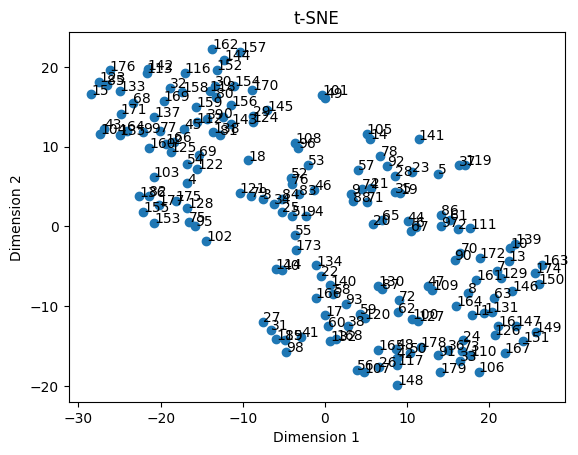

In [17]:
df = pd.read_csv("/mnt/data/users/snegishi/M2/espnet/egs2/jvs_ms_negishi/tts1/Xvector_Bert/data/full_NL_Xvector.csv",header=None)
df = df.rename(columns={0: 'NL'})
# df = pd.merge(df1,df2,on='NL')
df = pd.DataFrame({'NL':df['NL'], 'Vec':df.iloc[:,1:].values.tolist()})
vector = np.array(df['Vec'].tolist())

tsne = TSNE(n_components=2,perplexity=15)
tsne_xvector = tsne.fit_transform(vector)

df['tsne_x'] = tsne_xvector[:,0]
df['tsne_y'] = tsne_xvector[:,1]

# 埋め込みをプロットする
plt.scatter(tsne_xvector[:, 0], tsne_xvector[:, 1])

# 各点に対応するIDをアノテーションする
for i, id in enumerate(df['NL']):
    plt.annotate(i, (tsne_xvector[i, 0], tsne_xvector[i, 1]))

# プロットのラベルとタイトルを設定する
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE')

# プロットを表示する
plt.show()


In [18]:
print(df.loc[:,['NL','tsne_x']].sort_values('tsne_x').to_string(index=True))


                            NL     tsne_x
15         ぼーっとした感じでマイペースそうな女性 -28.467833
123               ゆったり話すクールな女子 -27.479618
104                 20歳程度のお姉さん -27.350874
43             明るく活発な陽キャ美少女中学生 -26.867579
85                若い女性の明るく元気な声 -26.491941
176               20～30歳ぐらいの女性 -26.176647
133            キリッとした真面目そうな女の子 -24.996712
135             クールでか細い声の女子中学生 -24.971462
171                 少し声の高い成人女性 -24.850777
64            やわらかい声色で親しげに話す女子 -24.109673
68     おちついたしっかり者で大人っぽい中学生の女の子 -23.351330
136            テンションの低い気だるげな女性 -22.613422
99                 高いキュートな声の少女 -22.160591
155                 キリッとした声の女性 -22.113823
113            間をおいて話す明るい女子中学生 -21.682158
142               少し声の低めの30代男性 -21.562235
82                元気な少年声の大人の女性 -21.465260
160                  幼さが残る成人女性 -21.410370
103                少年ぽさを感じる女の子 -20.817865
137                 セクシーな大人の女性 -20.766428
153                  声の高い40代女性 -20.748281
177                  高く細い声の女の人 -20.251266
77          声が高く清楚な雰囲気がかわいい女の子 -20

In [19]:
print(df.loc[:,['NL','tsne_y']].sort_values('tsne_y').to_string(index=True))


                            NL     tsne_y
148               中音程の40代のおじさん -19.859446
179                少し低い声の社会人男性 -18.290958
107          ゆっくり淡々と話す40代のおじさん -18.277359
106                      早口な男性 -18.252142
56                 ガラガラ声の男子高校生 -17.992487
26             深みのある低温ボイスの中年男性 -17.586105
117                70代近いおじいちゃん -17.342207
33           感情なさそうな渋い声の４０代おじ様 -16.828074
42            張りのない声の80歳おじいちゃん -16.519012
110                  間をおいて話す男性 -16.170105
91           少し早口でテンションの高いおじさん -16.163202
167                  冴えない軽そうな男 -15.845351
50           30歳ぐらいのしっかりしてそうな男 -15.836381
98                ゆっくり話すやさしい男性 -15.682475
73               紳士的で男前な渋いおじさん -15.612144
165                   爽やかなおじさん -15.462876
36            ハキハキ話すサラリーマンぽい男性 -15.444051
48           ねっとりとした話し方のオタク風男子 -15.390463
178               ふわふわした高い声の男性 -15.141776
151             丁寧に話す声の低めのおじさん -14.394785
132                 ボーイッシュな女の子 -14.304398
24             高音程の陽気な30歳のお兄さん -14.282374
89                貫禄のある紳士おじいさん -14

In [20]:
from math import sqrt
df['tsne_d'] = [sqrt(x**2+y**2)for x, y in zip(tsne_xvector[:,0],tsne_xvector[:,1])]
print(df.loc[:,['NL','tsne_d']].sort_values('tsne_d').to_string(index=True))


                            NL     tsne_d
94               丁寧そうなキャリアウーマン   2.662222
55                 低い声がクールなおば様   3.830832
51                少し声の高めな社会人女性   4.175542
173                ちょっと声の高い好青年   4.629293
88              テンションの高いアラサー女性   4.672351
46             はきはきとした低めの声の若い女   4.821026
134           爽やかで優しそうなイケボお兄さん   4.973911
83          ダウナー系でボーイッシュな女子中学生   5.113189
9                   男勝りな元気っ子女子   5.195822
25             声が高すぎず低すぎないお姉さん   5.510021
20                      低い声の女性   5.863356
71                とがった独特な声質の女性   5.998953
84              やる気のなさそうな低い声の女   6.205793
22         やわらかい声色で穏やかそうな男子大学生   6.247666
74          はきはきとしていて、とがった声の女性   6.517580
76            低く落ち着いた声がかっこいい女子   6.672753
34             テンションの低い中音程声の女性   6.831591
65        張りがなく、少し年を感じさせる大人の女性   7.058018
52          あまり声の高くない20歳ぐらいの女子   7.352004
21                  10歳のわんぱく少年   7.378969
140                早口な爽やかイケボ男子   7.405964
40            少し声の高いダウナー系18歳男子   7.527971
53           声が元気ではきはきしている中年女性   7

---

# t-SNEによる次元削減

In [25]:
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#形態素分解した後のデータフレームはすでにpickle化して持っている状態を想定
# with open('df_wakati.pickle', 'rb') as f:
#     df = pickle.load(f)

#tf-idfを用いてベクトル化
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["NL"])


In [28]:
#t-SNEで次元削減
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000, init="random")
X_embedded = tsne.fit_transform(X)


In [30]:
ddf = pd.concat([df, pd.DataFrame(X_embedded, columns = ['col1', 'col2'])], axis = 1)


In [34]:
article_list = ddf.index


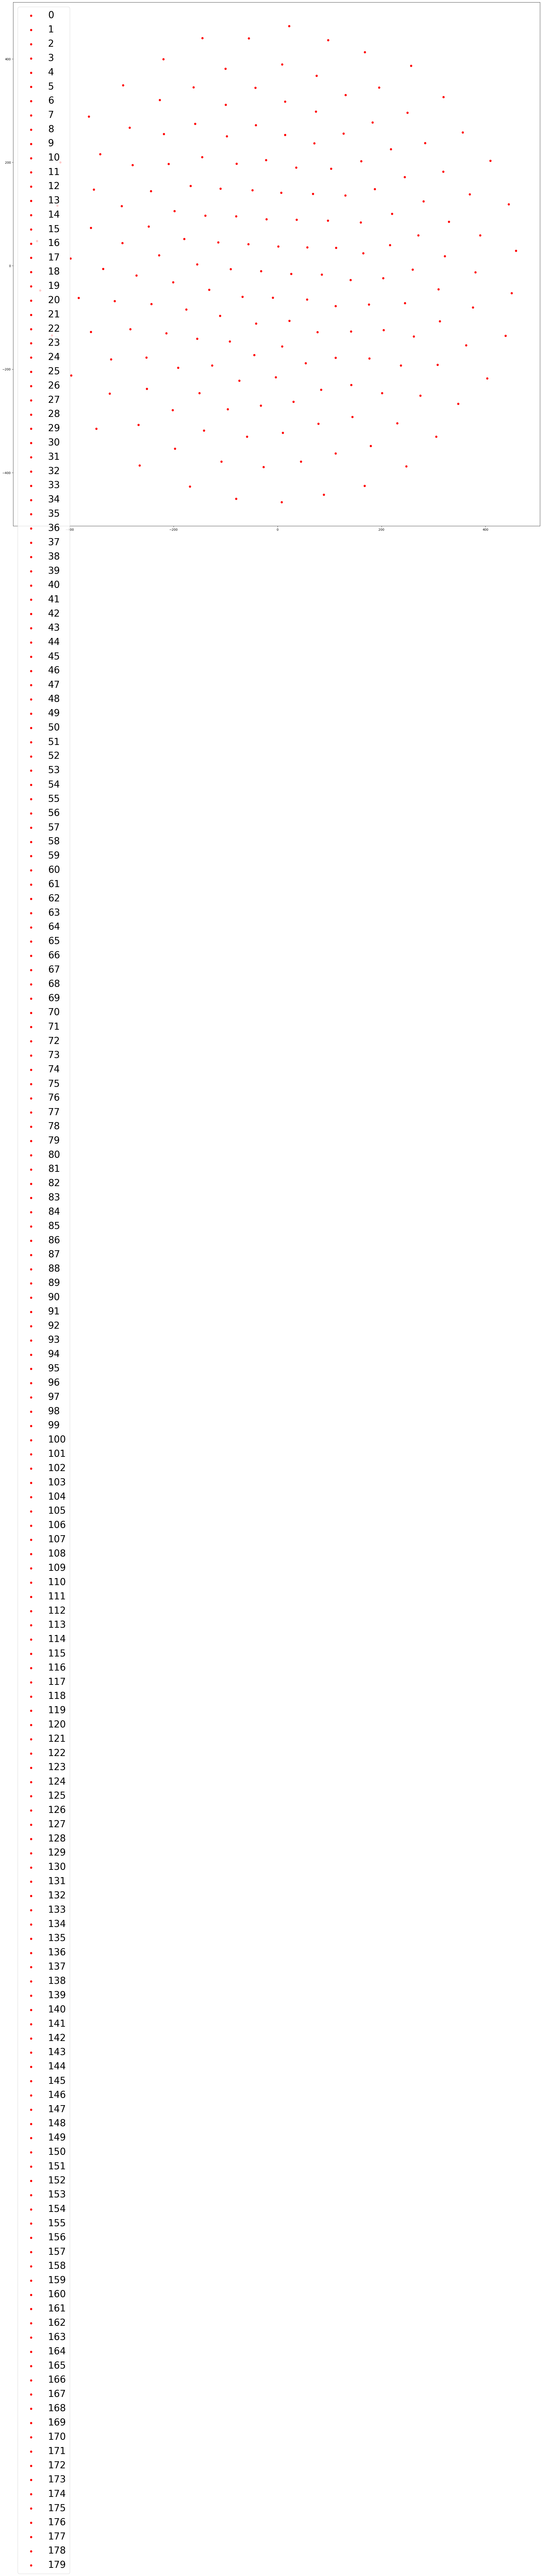

In [36]:
colors =  ["r", "g", "b", "c", "m", "y", "k", "orange","pink"]
plt.figure(figsize = (30, 30))
for i , v in enumerate(article_list):
    tmp_df = ddf[ddf.index == v]
    plt.scatter(tmp_df['col1'],  
                tmp_df['col2'],
                label = v,
                color = colors[0])

plt.legend(fontsize = 30)
